In [20]:
import numpy as np
import pandas as pd
import os
import math
import pickle


In [21]:
results_benders = pd.read_csv('~/PhD_workplace/MIE1612/project/results/results_all_benders.csv')
results_w_cc_75 = pd.read_csv('~/PhD_workplace/MIE1612/project/results/results_all_w_cut_clf_cutpct0.75.csv')
results_w_cc_50 = pd.read_csv('~/PhD_workplace/MIE1612/project/results/results_all_w_cut_clf_cutpct0.5.csv')
results_w_cc_25 = pd.read_csv('~/PhD_workplace/MIE1612/project/results/results_all_w_cut_clf_cutpct0.25.csv')
results_w_cc_10 = pd.read_csv('~/PhD_workplace/MIE1612/project/results/results_all_w_cut_clf_cutpct0.1.csv')


In [28]:
results_benders

,instance,MPobj,NoIters,NoCuts,Runtime,runtime_iter
0,cap134,6.852998e+07,38.0,3700.0,7.229626,"[0.166276216506958, 0.15334701538085938, 0.151..."
1,cap122,7.105910e+07,14.0,1204.0,2.194846,"[0.13611698150634766, 0.15903711318969727, 0.1..."
2,cap71,8.071130e+07,325.0,32400.0,482.240612,"[0.07895398139953613, 0.08189988136291504, 0.0..."
3,cap63,8.359677e+07,55.0,5400.0,12.889802,"[0.07898092269897461, 0.08908605575561523, 0.1..."
4,cap42,1.417421e+08,5.0,373.0,0.441131,"[0.07925915718078613, 0.09325480461120605, 0.1..."
5,cap94,9.061910e+07,28.0,2700.0,3.751746,"[0.0932769775390625, 0.10941505432128906, 0.12..."
6,cap83,1.719690e+08,35.0,3301.0,6.888693,"[0.0941920280456543, 0.11919093132019043, 0.10..."
7,cap111,1.057079e+08,118.0,11565.0,95.302061,"[0.1381978988647461, 0.16101813316345215, 0.16..."
8,cap114,1.060714e+08,125.0,12269.0,176.624485,"[0.143218994140625, 0.17038989067077637, 0.158..."
9,cap102,7.943209e+07,9.0,800.0,0.899329,"[0.09484577178955078, 0.09821486473083496, 0.0..."


In [31]:
results_benders.sort_values(by=['instance'])[['instance','NoIters', 'NoCuts', 'Runtime']].transpose()

,9,7,8,1,0,4,3,2,6,5
instance,cap102,cap111,cap114,cap122,cap134,cap42,cap63,cap71,cap83,cap94
NoIters,9.0,118.0,125.0,14.0,38.0,5.0,55.0,325.0,35.0,28.0
NoCuts,800.0,11565.0,12269.0,1204.0,3700.0,373.0,5400.0,32400.0,3301.0,2700.0
Runtime,0.899329,95.302061,176.624485,2.194846,7.229626,0.441131,12.889802,482.240612,6.888693,3.751746


In [32]:
results_w_cc_50.sort_values(by=['instance'])[['instance','NoIters', 'NoCuts', 'Runtime']].transpose()

,9,7,8,1,0,4,3,2,6,5
instance,cap102,cap111,cap114,cap122,cap134,cap42,cap63,cap71,cap83,cap94
NoIters,12.0,63.0,79.0,20.0,38.0,5.0,36.0,378.0,26.0,16.0
NoCuts,650.0,2937.0,3791.0,771.0,1998.0,236.0,1999.0,18900.0,1115.0,842.0
Runtime,4.282658,30.295247,44.887273,7.06251,16.206161,1.544672,14.331973,393.03805,9.233289,5.667428


In [33]:
results_w_cc_25.sort_values(by=['instance'])[['instance','NoIters', 'NoCuts', 'Runtime']].transpose()

,9,7,8,1,0,4,3,2,6,5
instance,cap102,cap111,cap114,cap122,cap134,cap42,cap63,cap71,cap83,cap94
NoIters,11.0,58.0,73.0,21.0,41.0,18.0,48.0,340.0,42.0,28.0
NoCuts,400.0,1446.0,1425.0,654.0,1249.0,287.0,1502.0,8550.0,1106.0,825.0
Runtime,3.982841,25.768236,30.699387,7.665104,16.12271,3.660091,19.192337,218.536775,16.514546,10.861146


In [34]:
results_w_cc_10.sort_values(by=['instance'])[['instance','NoIters', 'NoCuts', 'Runtime']].transpose()

,9,7,8,1,0,4,3,2,6,5
instance,cap102,cap111,cap114,cap122,cap134,cap42,cap63,cap71,cap83,cap94
NoIters,12.0,64.0,145.0,25.0,58.0,35.0,62.0,349.0,53.0,47.0
NoCuts,290.0,589.0,1449.0,379.0,993.0,272.0,390.0,3570.0,380.0,614.0
Runtime,4.247587,22.231603,70.414026,8.457318,20.270977,7.104519,16.948772,168.28931,13.594378,12.284055


In [35]:
results_w_cc_75.sort_values(by=['instance'])[['instance','NoIters', 'NoCuts', 'Runtime']].transpose()

,9,7,8,1,0,4,3,2,6,5
instance,cap102,cap111,cap114,cap122,cap134,cap42,cap63,cap71,cap83,cap94
NoIters,9.0,131.0,75.0,17.0,28.0,8.0,34.0,349.0,23.0,12.0
NoCuts,650.0,9626.0,5354.0,1031.0,1925.0,337.0,2574.0,26125.0,1464.0,905.0
Runtime,3.180459,119.77236,49.386954,6.627576,12.716467,1.9664,14.163897,518.772709,8.629622,4.414743


In [36]:
results_benders

,instance,MPobj,NoIters,NoCuts,Runtime,runtime_iter
0,cap134,6.852998e+07,38.0,3700.0,7.229626,"[0.166276216506958, 0.15334701538085938, 0.151..."
1,cap122,7.105910e+07,14.0,1204.0,2.194846,"[0.13611698150634766, 0.15903711318969727, 0.1..."
2,cap71,8.071130e+07,325.0,32400.0,482.240612,"[0.07895398139953613, 0.08189988136291504, 0.0..."
3,cap63,8.359677e+07,55.0,5400.0,12.889802,"[0.07898092269897461, 0.08908605575561523, 0.1..."
4,cap42,1.417421e+08,5.0,373.0,0.441131,"[0.07925915718078613, 0.09325480461120605, 0.1..."
5,cap94,9.061910e+07,28.0,2700.0,3.751746,"[0.0932769775390625, 0.10941505432128906, 0.12..."
6,cap83,1.719690e+08,35.0,3301.0,6.888693,"[0.0941920280456543, 0.11919093132019043, 0.10..."
7,cap111,1.057079e+08,118.0,11565.0,95.302061,"[0.1381978988647461, 0.16101813316345215, 0.16..."
8,cap114,1.060714e+08,125.0,12269.0,176.624485,"[0.143218994140625, 0.17038989067077637, 0.158..."
9,cap102,7.943209e+07,9.0,800.0,0.899329,"[0.09484577178955078, 0.09821486473083496, 0.0..."


In [65]:
# for instance in results_benders['instance']:
instance = 'cap71'
dfs = [results_benders, results_w_cc_75, results_w_cc_50, results_w_cc_25, results_w_cc_10]
df_names = ['benders', 'w_cc_75', 'w_cc_50', 'w_cc_25', 'w_cc_10']

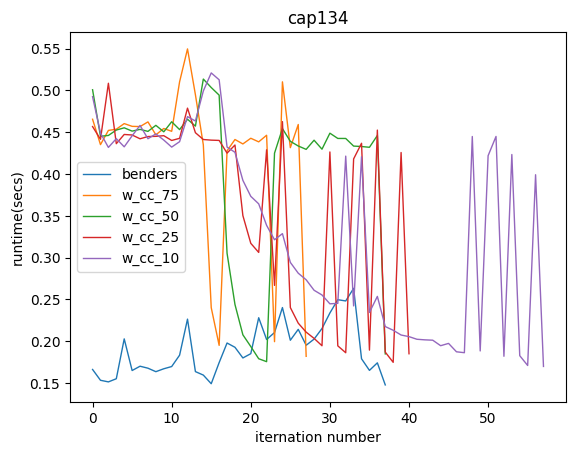

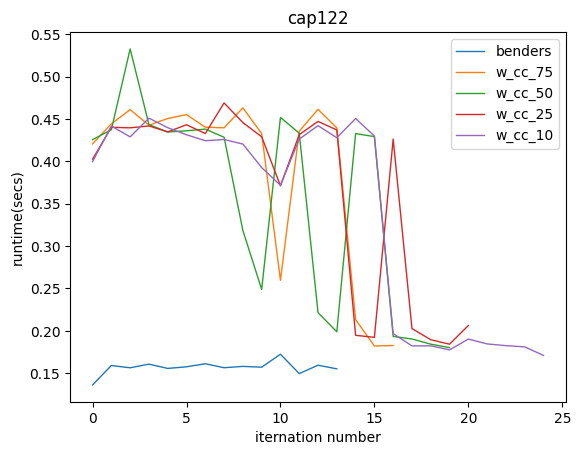

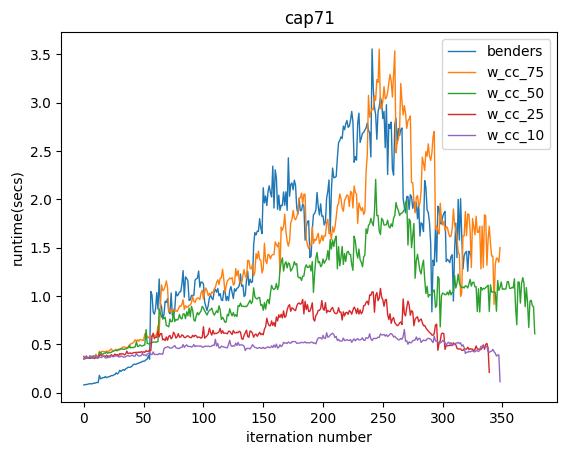

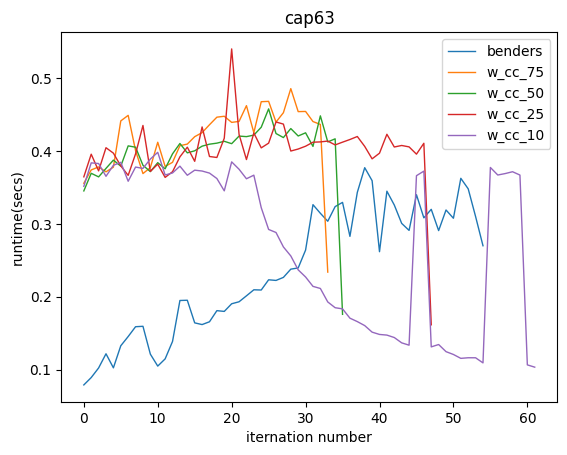

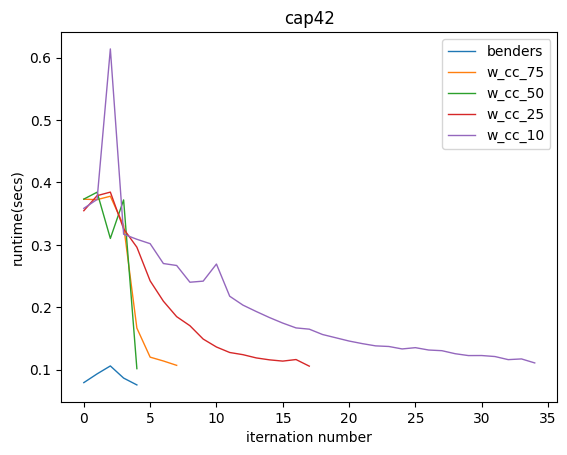

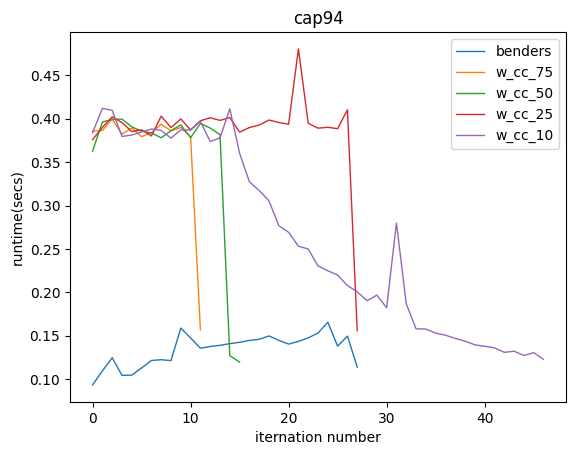

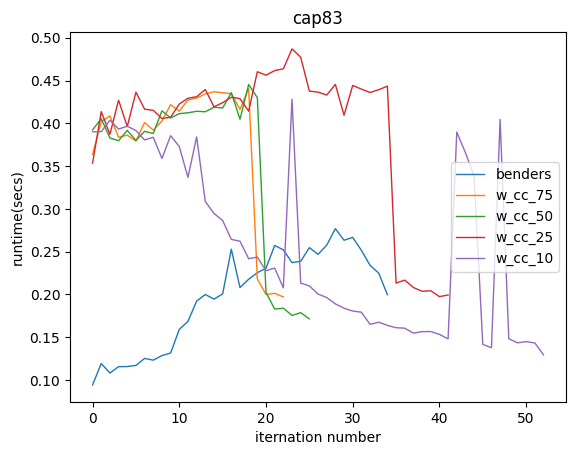

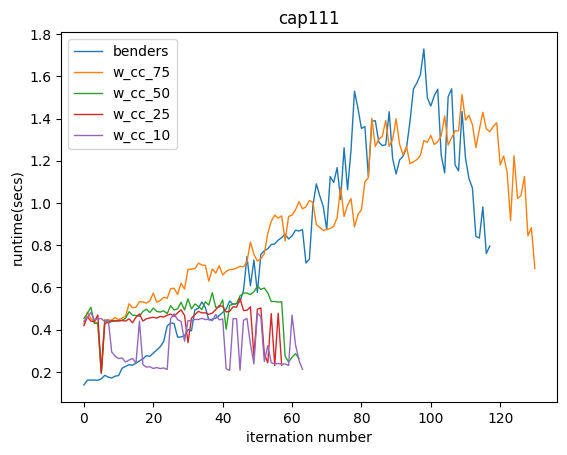

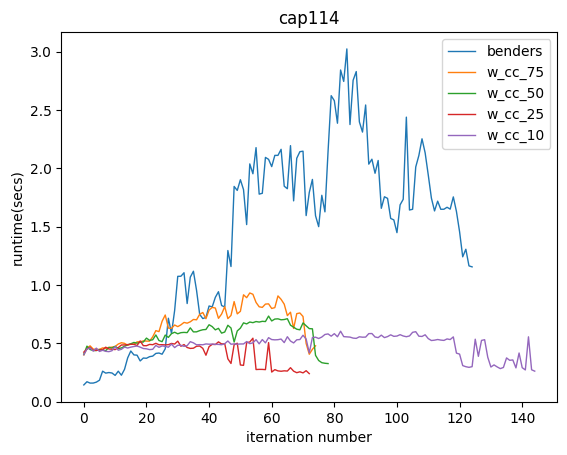

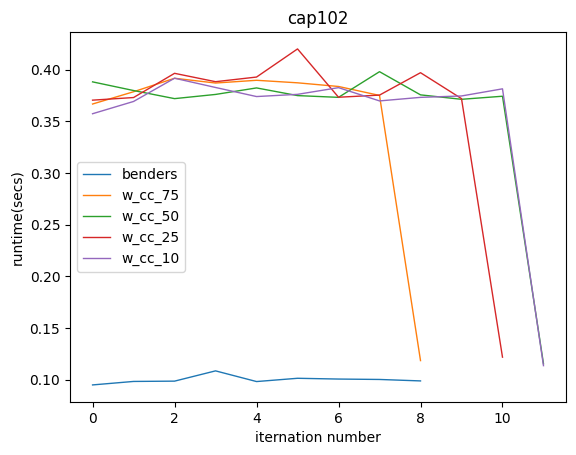

In [72]:
import matplotlib.pyplot as plt
for instance in results_benders['instance']:
    for df, df_name in zip(dfs, df_names):
        plt.plot(range(int(df[df['instance'] == instance]['NoIters'].values[0])),
                    literal_eval(df[df['instance'] == instance]['runtime_iter'].values[0]),
                 label = df_name,
                 linewidth=1)
        plt.xlabel('iternation number')
        plt.ylabel('runtime(secs)')
        plt.title(instance)
        plt.legend()
    plt.show()


In [51]:
int(df[df['instance'] == instance]['NoIters'].values[0])

325

In [58]:
from ast import literal_eval
literal_eval(df[df['instance'] == instance]['runtime_iter'].values[0])

[0.07895398139953613,
 0.08189988136291504,
 0.0825948715209961,
 0.08489608764648438,
 0.08908915519714355,
 0.09164619445800781,
 0.0899648666381836,
 0.09111285209655762,
 0.0957181453704834,
 0.09634685516357422,
 0.10063505172729492,
 0.10500597953796387,
 0.10219693183898926,
 0.17878103256225586,
 0.1420741081237793,
 0.14687895774841309,
 0.15594005584716797,
 0.1535320281982422,
 0.16628813743591309,
 0.1531519889831543,
 0.16056585311889648,
 0.16458964347839355,
 0.16680312156677246,
 0.17607569694519043,
 0.17429280281066895,
 0.18255615234375,
 0.18609881401062012,
 0.20399188995361328,
 0.19194793701171875,
 0.20221304893493652,
 0.23055005073547363,
 0.21904587745666504,
 0.22938227653503418,
 0.23772788047790527,
 0.22974801063537598,
 0.2451636791229248,
 0.2520318031311035,
 0.262073278427124,
 0.26099681854248047,
 0.2630960941314697,
 0.2698190212249756,
 0.2857992649078369,
 0.2943277359008789,
 0.2910473346710205,
 0.29462504386901855,
 0.30126380920410156,
 0.304